In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
players = pd.read_csv('players.csv')
players

,排名,球员,球队,得分,命中-出手,命中率,命中-三分,三分命中率,命中-罚球,罚球命中率,场次,上场时间
0,1,詹姆斯-哈登,火箭,31.9,9.60-21.10,0.454,4.20-10.70,0.397,8.50-9.90,0.861,30,36.1
1,2,扬尼斯-阿德托昆博,雄鹿,29.7,10.90-19.90,0.545,0.50-1.70,0.271,7.50-9.80,0.773,28,38.0
2,3,勒布朗-詹姆斯,骑士,28.2,10.80-18.80,0.572,2.10-5.10,0.411,4.50-5.80,0.775,32,37.3
3,4,斯蒂芬-库里,勇士,26.3,8.30-17.60,0.473,3.60-9.50,0.381,6.00-6.50,0.933,23,32.6
4,4,凯文-杜兰特,勇士,26.3,9.70-19.00,0.510,2.50-6.30,0.396,4.50-5.10,0.879,26,34.8
...,...,...,...,...,...,...,...,...,...,...,...,...
281,281,乔什-休斯蒂斯,雷霆,2.5,0.90-2.50,0.365,0.60-1.70,0.349,0.10-0.30,0.286,25,12.1
282,281,阿隆-阿弗拉罗,魔术,2.5,0.90-2.70,0.339,0.30-1.20,0.222,0.40-0.60,0.714,23,13.4
283,284,切迪-奥斯曼,骑士,2.3,0.90-1.80,0.512,0.30-0.80,0.421,0.10-0.10,1.000,24,7.8
284,285,德安德烈-利金斯,雄鹿,2.1,0.80-2.30,0.344,0.40-1.30,0.333,0.10-0.20,0.400,26,15.7


可以看到得分命中率三分命中率罚球命中率都是数值型变量但量纲不一致，所以要标准化一下

D:\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
D:\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
D:\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 21629 (\N{CJK UNIFIED IDEOGRAPH-547D}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
D:\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
D:\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


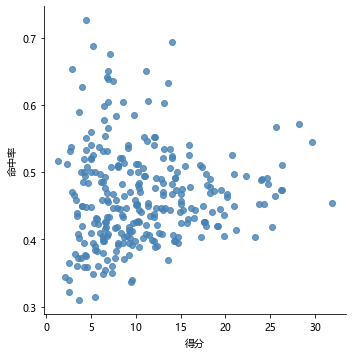

In [11]:
#绘制得分与命中率之间的散点图
sns.lmplot(x='得分',y='命中率',data = players,fit_reg = False,scatter_kws = {'alpha':0.8,'color':'steelblue'})
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [12]:
def k_SSE(X,clusters):
    #选择连续的K种不同的值
    K = range(1,clusters+1)
    #构建空列表用于存储簇内离差平方和
    TSSE = []
    for k in K:
        #用于存储各个簇内离差平方和
        SSE = []
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X)
        #返回簇标签
        labels = kmeans.labels_
        #返回簇中心
        centers = kmeans.cluster_centers_
        #计算各簇样本的离差平方和，并保存到列表中
        for label in set(labels):
            SSE.append(np.sum((X.loc[labels == label,:] - centers[label,:])**2))
        #计算总的簇内离差平方和
        TSSE.append(np.sum(SSE))
        
    #中文和负号显示
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    #设置绘图风格
    plt.style.use('ggplot')
    #绘制K的个数与TSSE的关系
    plt.plot(K,TSSE,'b*-')
    plt.xlabel('簇的个数')
    plt.ylabel('簇内离差平方和之和')
    plt.show()

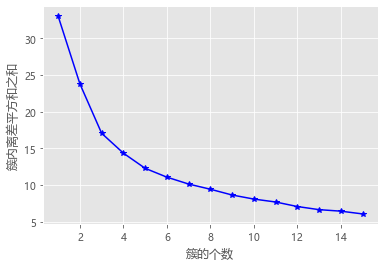

In [14]:
from sklearn import preprocessing
#数据标准化处理
X = preprocessing.minmax_scale(players[['得分','罚球命中率','命中率','三分命中率']])

#将数据转换为数据框
X = pd.DataFrame(X,columns=['得分','罚球命中率','命中率','三分命中率'])

#使用拐点法选择最佳的K值
k_SSE(X,15)

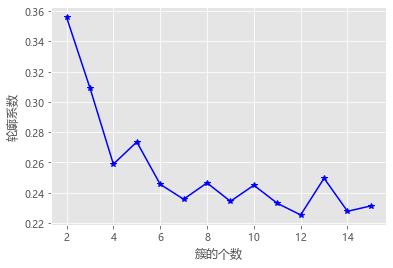

In [25]:
#导入第三方模块
from sklearn import metrics
#构造自定义函数
def k_silhouette(X,clusters):
    K=range(2,clusters+1)
    #构建空列表，用于存储不同簇数下的轮廓系数
    S= []
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit (X)
        labels = kmeans.labels_
        #调用子模块metrics中的silhouette score 函数，计算轮廓系数
        S.append (metrics. silhouette_score(X, labels, metric='euclidean'))
    #设置绘图风格
    plt.style.use ('ggplot')
    #绘制K的个数与轮廓系数的关系
    plt.plot(K,S,'b*-')
    plt.xlabel('簇的个数')
    plt.ylabel ('轮廓系数')
#显示图形
plt. show()
#自定义函数的调用
k_silhouette(X,15)

C:\Users\Jay Shen\AppData\Local\Temp\ipykernel_12372\2052154002.py:46: RuntimeWarning: divide by zero encountered in log
  gaps = (np.log(Wkbs)).mean(axis = 1) - np.log(Wks)
C:\Users\Jay Shen\AppData\Local\Temp\ipykernel_12372\2052154002.py:50: RuntimeWarning: invalid value encountered in subtract
  gapDiff = gaps[:-1] - gaps[1:] + sk[1:]


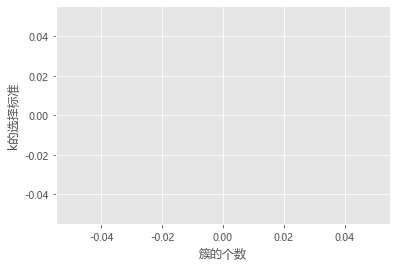

In [42]:
#自定义函数，计算簇内任意两样本之间的欧氏距离Dk
def short_pair_wise_D(each_cluster):
    mu = each_cluster.mean(axis= 0)
    Dk = sum(sum((each_cluster - mu)**2)) * 2.0 * each_cluster.shape[0]
    return Dk
#自定义函数，计算簇内的Wk值
def compute_Wk(data, classfication_result):
    Wk =0
    label_set = set(classfication_result)
    for label in label_set:
        each_cluster = data[classfication_result == label,:]
        Wk = Wk + short_pair_wise_D(each_cluster)/ (2.0*each_cluster.shape[0])
    return Wk

#自定义函数，计算GAP统计量
def gap_statistic(X, B=10,K=range(1,11),N_init = 10) :
    #将输入数据集转换为数组
    X = np.array(X)
    #生成B组参照数据集
    shape = X.shape
    tops = X.max(axis=0)
    bots = X.min(axis=0)
    dists = np.matrix(np.diag(tops-bots))
    rands = np.random.random_sample(size=(B,shape[0],shape[1]))
    for i in range(B):
        rands[i,:,:] = rands[i,:,:]*dists+bots

    #自定义0元素的数组，用于存储gaps、 Wks和Wkbs
    gaps = np.zeros(len(K))
    Wks = np.zeros(len(K) )
    Wkbs = np.zeros((len(K),B))
#循环不同的k值，计算各簇下的Wk值
    for idxk, k in enumerate(K) :
        k_means = KMeans(n_clusters=k)
        k_means.fit(X)
        classfication_result = k_means.labels_
        #将所有簇内的Wk存储起来
        Wkbs[idxk] = compute_Wk (X,classfication_result)
    #通过循环，计算每一个参照数据集下的各簇Wk值
    for i in range(B):
        Xb = rands[i,:,:]
        k_means. fit(Xb)
        classfication_result_b = k_means.labels_
        Wkbs[idxk,i] = compute_Wk(Xb,classfication_result_b)
    #计算gaps. sd ks. sk Fn gapDiff
    gaps = (np.log(Wkbs)).mean(axis = 1) - np.log(Wks)
    sd_ks = np.std(np.log(Wkbs),axis=1)
    sk = sd_ks*np.sqrt(1+1.0/B)
    #用于判别最佳k的标准，当gapDiff首次为正时，对应的k即为目标值
    gapDiff = gaps[:-1] - gaps[1:] + sk[1:]
    #设置绘图风格
    plt.style.use('ggplot')
    #绘制gapDiff的条形图
    plt.bar (np.arange(len(gapDiff))+1, gapDiff, color = 'steelblue')
    plt.xlabel('簇的个数')
    plt.ylabel('k的选择标准')
    plt.show()
                                                                                
#自定义函数的调用
gap_statistic(X,B=20,K=range(1,16))


上面这个代码有点问题我改不出来了...所以我们姑且认为把球员分成三类

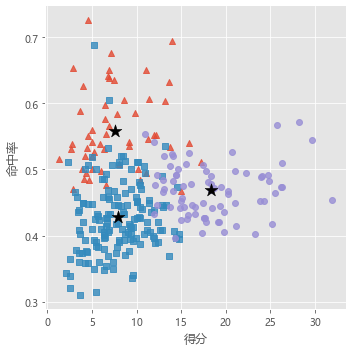

In [45]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
#将聚类结果标签插入到数据集players中
players['cluster'] = kmeans.labels_
#构建空列表用于存储三个簇的簇中心
centers = []
for i in players.cluster.unique():
    centers.append(players.loc[players.cluster == i,['得分','罚球命中率','命中率','三分命中率']].mean())
    
#将列表转换为数组，便于后面的索引取数
centers = np.array(centers)

#绘制散点图
sns.lmplot(x='得分',y='命中率',hue='cluster',data = players,markers = ['^','s','o'],
          fit_reg = False,scatter_kws = {'alpha':0.8},legend = False)

#添加簇中心
plt.scatter(centers[:,0],centers[:,2],c='k',marker='*',s=180)
plt.xlabel('得分')
plt.ylabel('命中率')
plt.show()

## 使用标准化后的中心点绘制雷达图

In [49]:
import pygal
#调用模型计算出来的簇中心
centers_std = kmeans.cluster_centers_
#设置填充型雷达图
radar_chart = pygal.Radar(fill = True)
#添加雷达图各顶点的名称
radar_chart.x_labels = ['得分','罚球命中率','命中率','三分命中率']

#绘制雷达图代表三个簇中心的指标值
radar_chart.add('C1',centers_std[0])
radar_chart.add('C2',centers_std[1])
radar_chart.add('C3',centers_std[2])

radar_chart.render_to_file('radar_chart.svg')

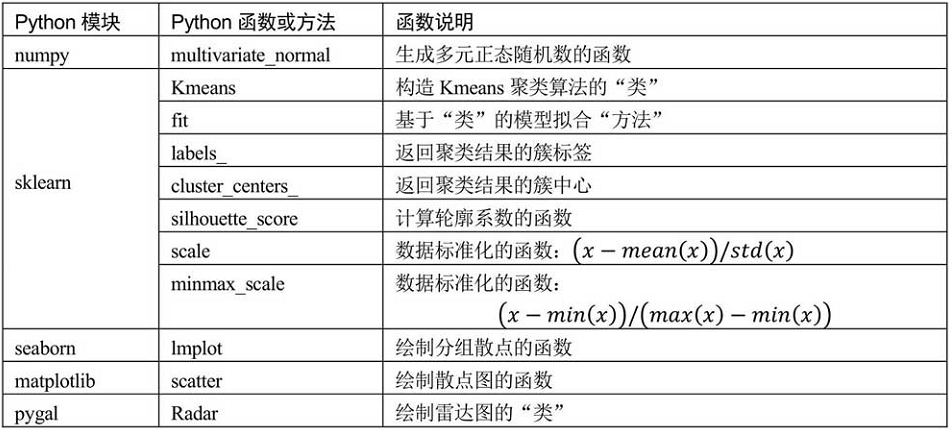